#**Project Assignment**
#**Portfolio Optimization**

Github Link: https://github.com/akshatjain1004/Portfolio-Theory-for-Indian-Market

Report: https://docs.google.com/document/d/1dVDmRNktCE1NB3xOnR6GGbGM6O9NGleVIdkPz4ogDUk/edit?usp=sharing 

**Pre-requisites**

In [ ]:
#require imports
%pip install yfinance cvxopt
import cvxpy as cp

import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**1. Defining our Market Index:**
The Nifty 500 is a market index that represents the top 500 companies listed on the National Stock Exchange (NSE) in India. It includes large, mid, and small-cap stocks from a wide range of sectors, making it a well-diversified index that represents the overall market.

The Capital Asset Pricing Model (CAPM) is a widely used method for estimating the expected return on an investment by taking into account the risk-free rate, the expected market return, and the beta coefficient of the security. The beta coefficient measures the volatility of the security relative to the overall market.

The Nifty 500 is a good choice for the CAPM model because it provides a broad-based representation of the Indian stock market. As a result, it can serve as a suitable proxy for the market portfolio, which is a key assumption of the CAPM model.

Using the Nifty 500 as the market index in the CAPM model can help investors estimate the expected return on their investments more accurately. By calculating the beta coefficient of a security relative to the Nifty 500, investors can better assess the security's risk relative to the overall market.

Overall, the Nifty 500 is a good choice for the CAPM model in the Indian market due to its diversification, large number of constituents, and broad-based representation of the market.
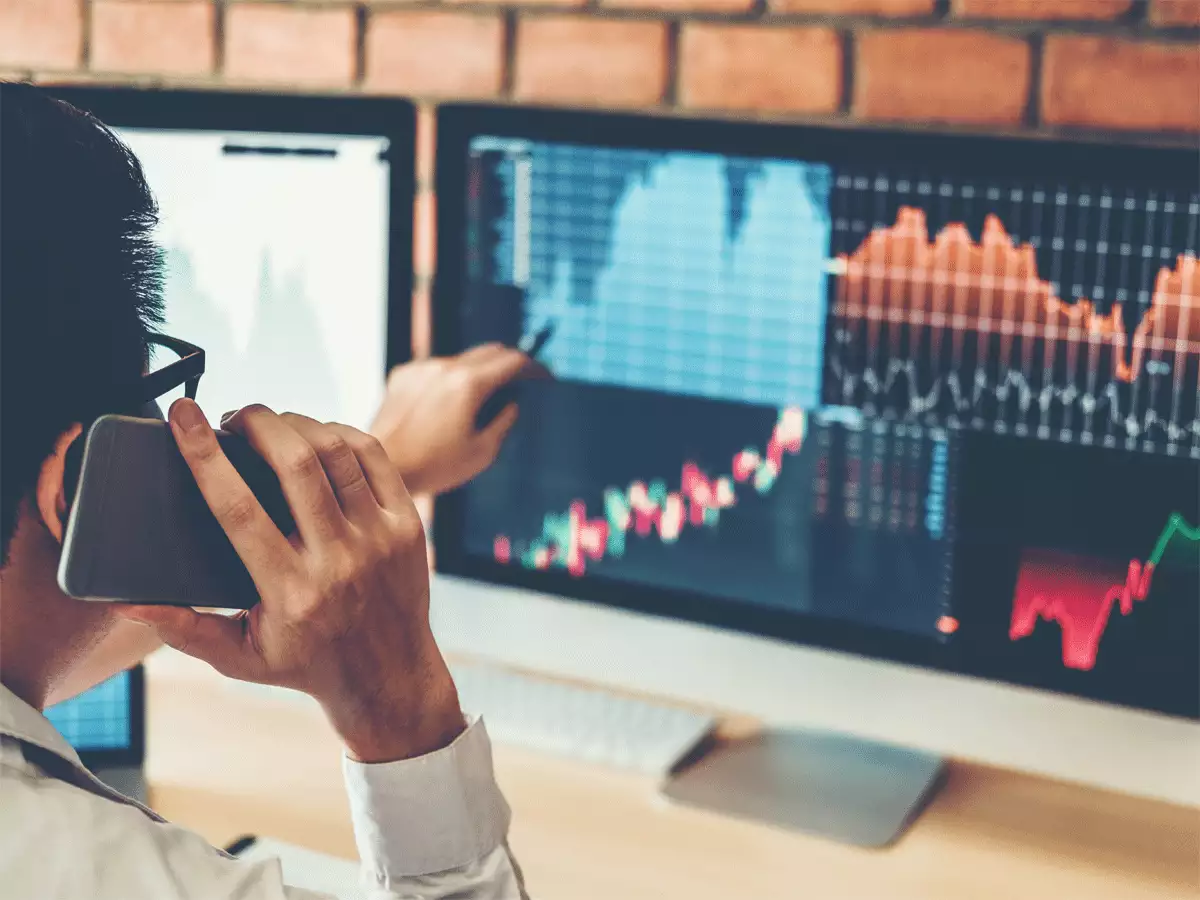

In [ ]:
market= "^CRSLDX" #market index NIFTY-500
end_date = '2022-09-17' #end date (3months = 62 business days)
start_date = '2022-06-17' #start date
market = yf.download(market, start=start_date, end=end_date)['Close']
market = market.pct_change().dropna() #calc simple returns
market


[*********************100%***********************]  1 of 1 completed


Date
2022-06-20   -0.003386
2022-06-21    0.022481
2022-06-22   -0.014662
2022-06-23    0.010044
2022-06-24    0.010904
                ...   
2022-09-12    0.007112
2022-09-13    0.005935
2022-09-14   -0.002498
2022-09-15   -0.003221
2022-09-16   -0.021591
Name: Close, Length: 62, dtype: float64

## **2. Defining the stock universe:** 
We pick the top-10 largest NSE stocks by market capitalisation and use their 3 month closing price to obtain simple returns.

In [ ]:
tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS","INFY.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "ITC.NS", "HDFC.NS", "SBIN.NS","BHARTIARTL.NS"] #10 risky assets
prices = yf.download(tickers, start=start_date, end=end_date)['Close']  #closing price
returns = prices.pct_change().dropna()  #cal simple returns

[*********************100%***********************]  10 of 10 completed


In [ ]:
#cal mu or expected returns & sigma or risk of the assets
mu = returns.mean()
Sigma = returns.cov()
mu.shape

(10,)

## **3. Visualising the data**

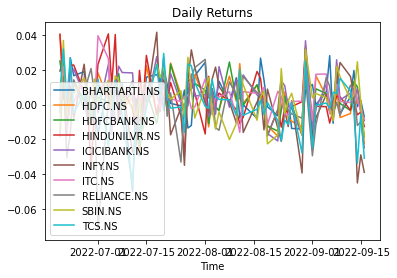

In [ ]:
for col in returns.columns:
  plt.plot(returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Time")
plt.legend()
plt.show()

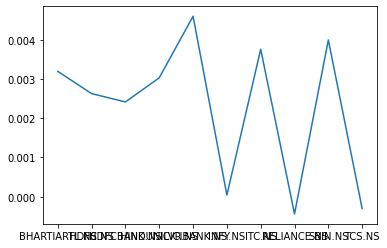

In [ ]:
plt.plot(mu)

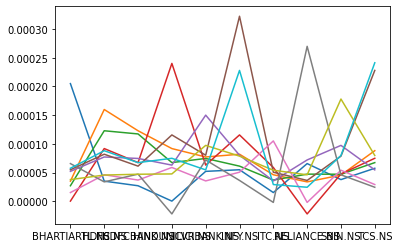

In [ ]:
plt.plot(Sigma)

## **4. Markowitz Portfolio Theory**

In [ ]:
c= np.array(Sigma)
c.shape

(10, 10)

### **A. Markowitz Bullet**

In [ ]:
#calc weights
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

sigmas=[]
mus=[]
for i in range(10000):
  w= rand_weights(10)
  mu1= np.array(mu)@w.T
  sigma= w@c@w.T
  # print(mu1)
  if(sigma>2):
    i-=1
  else:
    sigmas.append(sigma**0.5)
    mus.append(mu1)


[[3.08638000e-01 4.99848164e+01]
 [4.99848164e+01 1.91573081e+04]]


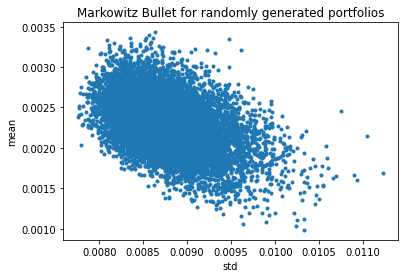

In [ ]:
#plot
u=np.array([1,1,1,1,1,1,1,1,1,1])


plt.plot(sigmas, mus, '.')
M=np.array([[mu@np.linalg.inv(c) @mu.T, u@np.linalg.inv(c)@mu.T],[mu@np.linalg.inv(c)@u.T, u@np.linalg.inv(c)@u.T]])

plt.xlabel('std')
plt.ylabel('mean')
plt.title('Markowitz Bullet for randomly generated portfolios')
print(M)
# py.iplot_mpl(fig, filename='mean_std', strip_style=True)

### **B. Markowitz Efficient Frontier**

In [ ]:
mu= np.array(mu)
mu_min= min(mu)
mu_max= max(mu)
n_assets = 10
w = cp.Variable(n_assets)
target_sigma = cp.Parameter(nonneg=True)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)
constraints = [cp.sum(w) == 1, cp.quad_form(w, c) <= target_sigma**2]

frontier_weights = []
frontier_returns = []

for sigma in sigmas:
    target_sigma.value = sigma
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)            
    except:
        continue




/usr/local/lib/python3.8/dist-packages/cvxpy/reductions/solvers/solving_chain.py:123: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  def construct_solving_chain(problem, candidates,
/usr/local/lib/python3.8/dist-packages/cvxpy/reductions/solvers/solving_chain.py:178: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/usr/local/lib/python3.8/dist-packages/cvxpy/reductions/solvers/solving_chai

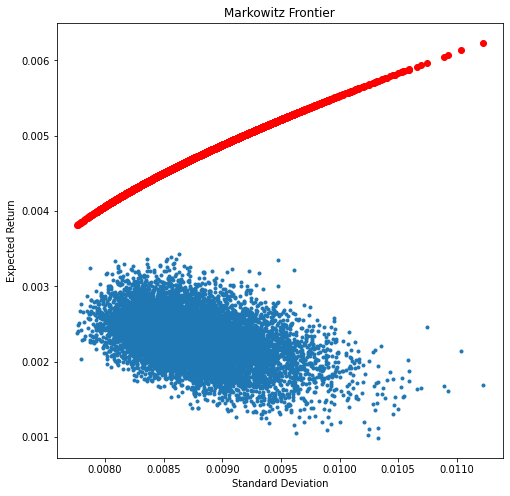

In [ ]:
#plot
plt.subplots(figsize=(8,8))
plt.scatter(sigmas, frontier_returns,c='r')
plt.plot(sigmas, mus, '.')
plt.title('Markowitz Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

## **5. Capital Market Line**

In [ ]:
data={'Returns':frontier_returns,'Volatility':sigmas}  # resturns and standard deviation for 1000 portfolios
portfolios_V1=pd.DataFrame(data)
print(portfolios_V1.shape)
portfolios_V1.head()

(10000, 2)


,Returns,Volatility
0,0.004937,0.009089
1,0.004905,0.009044
2,0.005034,0.009229
3,0.004874,0.008999
4,0.004483,0.008479


In [ ]:
min_vol_port=portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]      # point at which standard deviation (risk/sigma) is minimum
min_vol_port

Returns       0.003807
Volatility    0.007762
Name: 4495, dtype: float64

In [ ]:
rf=0.00074   # return of risk free asset
optimal_risky_port=portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]  ## point for which slope(Sharpe ratio) is maximum
print(optimal_risky_port)

Returns       0.006233
Volatility    0.011220
Name: 9653, dtype: float64


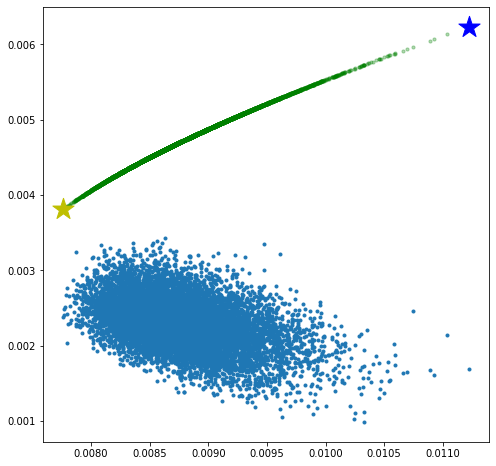

In [ ]:
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_V1['Volatility'],portfolios_V1['Returns'],marker='o',s=10,alpha=0.3,color='green')
plt.scatter(min_vol_port[1],min_vol_port[0],color='y',marker='*',s=500)
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],color='b',marker='*',s=500)
plt.plot(sigmas, mus, '.')

In [ ]:
market_mu=np.mean(market)
print(market_mu)
market_sigma=np.sqrt(np.var(market))
print(market_sigma)

0.0026123046243884092
0.00827346041887853


In [ ]:
cal_x1 = []
cal_y1 = []

cal_x2 = []
cal_y2 = []


In [ ]:
# 
for er in np.linspace(rf, max(frontier_returns), 20):
    sd = (er - rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])  # getting the value of std ( on x-axis) for corresponding expected_return/mean (on y-axis).
    cal_x1.append(sd)
    cal_y1.append(er)


for er in np.linspace(rf, max(frontier_returns), 20):
    sd = (er - rf)/((market_mu-rf)/market_sigma)  # getting the value of std ( on x-axis) for corresponding expected_return/mean (on y-axis).
    cal_x2.append(sd)
    cal_y2.append(er)



Use a risk-free asset along with the 10 risky assets to obtain CAP"M". Draw the straight line and show that it is tangent to the efficient frontier. Obtain the market portfolio.

Slope of Capital Market Line is : 0.4895774209552571


Text(0.5, 1.0, 'Capital Asset Pricing Model')

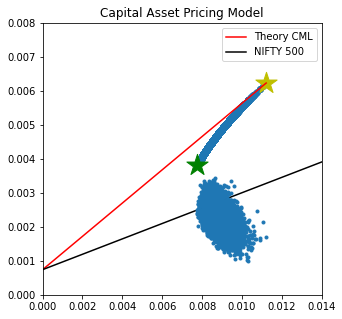

In [ ]:
plt.subplots(figsize=(5,5))
plt.scatter(portfolios_V1['Volatility'], portfolios_V1['Returns'])  
plt.scatter(min_vol_port[1], min_vol_port[0], color='g',marker='*',s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='y',marker='*',s=500)
plt.xlim(0,0.014)
plt.ylim(0,0.008)
plt.plot(cal_x1, cal_y1, color='r', label='Theory CML')  # plotting capital market line

plt.plot(cal_x2, cal_y2, color='black',label= 'NIFTY 500')  

plt.plot(sigmas, mus, '.')
slope=(optimal_risky_port[0]-rf)/optimal_risky_port[1]
# title="Slope of line :  "+str(slope)
print("Slope of Capital Market Line is :",slope)
plt.legend()


plt.title('Capital Asset Pricing Model')

## **6. Security Market Line**

In [ ]:
R_f = 0.00074 # risk-free rate - (6 month bond yield of Indian government)

end_date = '2022-09-17'
start_date = '2022-06-17'

market = yf.download("^NSEI", start=start_date, end=end_date)['Close']
market_returns = market.pct_change().dropna()

R_m = market_returns.mean() # expected market return E(R_mkt)

tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS","INFY.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "ITC.NS", "HDFC.NS", "SBIN.NS","BHARTIARTL.NS"]
stocks = yf.download(tickers, start=start_date, end=end_date)['Close']
stock_returns = stocks.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


In [ ]:
# getting beta value for each stock using linear regression
def get_beta(stock_name):
  b, a = np.polyfit(market_returns, stock_returns[stock_name], 1)
  return b

In [ ]:
stock_data = pd.DataFrame()
stock_data['stock'] = tickers
stock_data['expected_returns'] = np.array(stock_returns.mean()) # E(R_i) - mean of original returns
stock_data['beta'] = [get_beta(i) for i in tickers]

In [ ]:
stock_data

,stock,expected_returns,beta
0,RELIANCE.NS,0.003198,0.985559
1,TCS.NS,0.002630,1.160965
2,HDFCBANK.NS,0.002418,0.893248
3,INFY.NS,0.003034,1.437941
4,ICICIBANK.NS,0.004605,1.079688
5,HINDUNILVR.NS,0.000040,0.845619
6,ITC.NS,0.003764,0.519753
7,HDFC.NS,-0.000440,0.990652
8,SBIN.NS,0.004000,0.953643
9,BHARTIARTL.NS,-0.000305,0.601928


In [ ]:
def SML(rf,rm,label):
    betas = [x/10 for x in range(3,17)]
    assetReturns = [rf+(rm-rf)*x for x in betas]
    plt.plot(betas,assetReturns,label=label, color = 'black')
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.plot(1,rm,"ro")

def SML_point(stock, R_f, R_m):
  plt.scatter(stock['beta'], stock['expected_returns'], label=f"{stock['stock']}" )
  on_sml = R_f + stock['beta']*(R_m - R_f) # returns estimated using sml
  plt.scatter(stock['beta'], on_sml,  color = 'grey', alpha = 0.7)
  plt.vlines(x=stock['beta'], ymin=min(stock['expected_returns'], on_sml), ymax=max(stock['expected_returns'], on_sml), colors='grey', ls='--', lw=1.5, alpha = 0.7)

5. Use any three assets out of the 10 risky assets to get three different Security Market Lines.

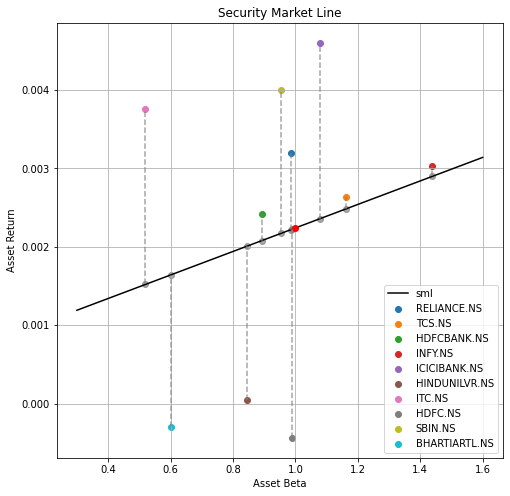

In [ ]:
plt.figure(figsize=(8,8))
SML(R_f, R_m, 'sml')
for i in range(10):
  SML_point(stock_data.iloc[i], R_f, R_m)
plt.legend()
plt.grid()
plt.show()



- Any security priced above the SML is deemed to be undervalued since investors expect a higher return given the same amount of risk. Conversely, any security priced below the SML is deemed to be overvalued




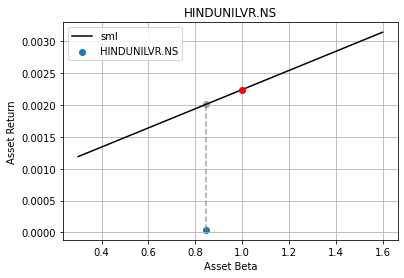

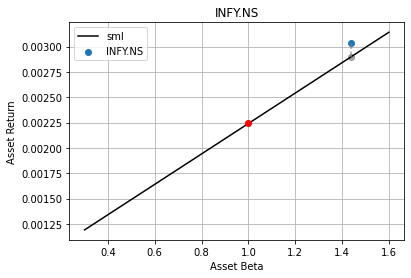

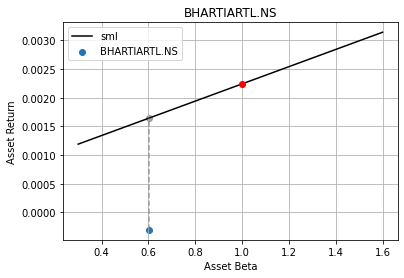

In [ ]:
for i in [5,3,9]:
  stock = stock_data.iloc[i]
  SML(R_f, R_m, 'sml')
  SML_point(stock_data.iloc[i], R_f, R_m)
  plt.legend()
  plt.grid()
  plt.title(f'{stock["stock"]}')
  plt.show()